### Importing initial libraries

In [1]:
import investpy as inv
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (16, 8)
import pandas as pd
import seaborn as sns
%config Completer.use_jedi = False # this speeds up autocomplete

### Initial search from Banco Central

In [2]:
'''
Code from: https://www.youtube.com/watch?v=7rFsu48oBn8&list=PLCAhGm8nJ9CBn51o0x3j1p1LuMRqpeqCy
I added the arguments 'data_inicio' and 'data_final' to help filtering the data.
''' 

# Creating scraping code
def consulta_bc(codigo_bcb, data_inicio = '2014-01-01', data_final = '2021-01-01'):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  df = df[df.index >= data_inicio]
  return df[df.index < data_final]

### Downloading data

#### Indexes and national interest fees

In [3]:
# Inflation index
ipca = consulta_bc(433)

In [4]:
# Civil construction index
incc = consulta_bc(7462)

In [5]:
# CDI - Interbank deposit credit monthly
cdi = consulta_bc(4391)

In [6]:
# Selic Tax
selic = consulta_bc(4390)

In [7]:
# Vacancy index
desocup = consulta_bc(24369)

In [8]:
# Commodities energy index
energia_index_commodity = consulta_bc(27577)

#### Civil construction

In [9]:
# Index of expenditures in civil construction
index_insumos_da_constr_civil = consulta_bc(21868)

In [10]:
# Expenditures in civil construction
insumos_da_constr_civil = consulta_bc(22761)

In [11]:
# Credit operations in civil construction
op_de_credito_na_contr_civil = consulta_bc(22030)

In [12]:
# Index of formal employment in civil construction
empregos_construcao_civil = consulta_bc(25255)

In [13]:
# Expenditures in construction materials
gastos_materiais_construcao = consulta_bc(28484)

#### Energy indices

In [14]:
# Comercial energy consumption in GWh
consumo_energia_comercial = consulta_bc(1402)

In [15]:
# Residential energy consumption in GWh
consumo_energia_residencial = consulta_bc(1403)

In [16]:
# Industrial energy consumption in GWh
consumo_energia_industrial = consulta_bc(1404)

In [17]:
# Others energy consumption in GWh
consumo_energia_outros = consulta_bc(1405)

In [18]:
# Total energy consumption in GWh
consumo_energia_total = consulta_bc(1406)

### Joining data

In [19]:
interest_data = pd.DataFrame()

# Indexes and national interest fees
interest_data['ipca'] = ipca['valor']
interest_data['incc'] = incc['valor']
interest_data['cdi'] = cdi['valor']
interest_data['selic'] = selic['valor']
interest_data['desocup'] = desocup['valor']
interest_data['energia_index_commodity'] = energia_index_commodity['valor']

# Civil construction
interest_data['index_insumos_da_constr_civil'] = index_insumos_da_constr_civil['valor']
interest_data['insumos_da_constr_civil'] = insumos_da_constr_civil['valor']
interest_data['op_de_credito_na_contr_civil'] = op_de_credito_na_contr_civil['valor']
interest_data['empregos_construcao_civil'] = empregos_construcao_civil['valor']
interest_data['gastos_materiais_construcao'] = gastos_materiais_construcao['valor']

# Energy indices
interest_data['consumo_energia_comercial'] = consumo_energia_comercial['valor']
interest_data['consumo_energia_residencial'] = consumo_energia_residencial['valor']
interest_data['consumo_energia_industrial'] = consumo_energia_industrial['valor']
interest_data['consumo_energia_outros'] = consumo_energia_outros['valor']
interest_data['consumo_energia_total'] = consumo_energia_total['valor']

In [20]:
interest_data

ipca  incc   cdi  selic  desocup  energia_index_commodity  \
data                                                                    
2014-01-01  0.55  0.54  0.84   0.85      6.4                    83.66   
2014-02-01  0.69  0.62  0.78   0.79      6.7                    85.28   
2014-03-01  0.92  0.57  0.76   0.77      7.2                    81.71   
2014-04-01  0.67  0.77  0.82   0.82      7.1                    79.89   
2014-05-01  0.46  0.57  0.86   0.87      7.0                    78.96   
...          ...   ...   ...    ...      ...                      ...   
2020-08-01  0.24  1.42  0.16   0.16     14.4                   109.12   
2020-09-01  0.64  2.50  0.16   0.16     14.6                   106.04   
2020-10-01  0.86  3.39  0.16   0.16     14.3                   113.71   
2020-11-01  0.89  2.44  0.15   0.15     14.1                   110.59   
2020-12-01  1.35  1.34  0.16   0.16     13.9                   113.29   

            index_insumos_da_constr_civil  insumos_da_constr_civil  \
data                                                                 
2014-01-01                           92.2                      0.0   
2014-02-01                           93.2                     36.6   
2014-03-01                           96.8                     40.5   
2014-04-01                           94.0                     24.4   
2014-05-01                           98.0                     41.0   
...                                   ...                      ...   
2020-08-01                           82.7                     -0.9   
2020-09-01                           84.1                      0.2   
2020-10-01                           88.0                      0.6   
2020-11-01                           83.4                      0.7   
2020-12-01                           75.9                     10.1   

            op_de_credito_na_contr_civil  empregos_construcao_civil  \
data                                                                  
2014-01-01                        108183                     254.31   
2014-02-01                        109148                     256.93   
2014-03-01                        110389                     257.05   
2014-04-01                        112023                     257.72   
2014-05-01                        113985                     258.24   
...                                  ...                        ...   
2020-08-01                         71749                        NaN   
2020-09-01                         73514                        NaN   
2020-10-01                         74361                        NaN   
2020-11-01                         75753                        NaN   
2020-12-01                         76772                        NaN   

            gastos_materiais_construcao  consumo_energia_comercial  \
data                                                                 
2014-01-01                        101.4                     7745.0   
2014-02-01                        105.3                     8204.0   
2014-03-01                        101.5                     7744.0   
2014-04-01                        100.3                     7588.0   
2014-05-01                        100.8                     7304.0   
...                                 ...                        ...   
2020-08-01                        119.4                     6259.0   
2020-09-01                        122.3                     6667.0   
2020-10-01                        118.4                     7286.0   
2020-11-01                        115.9                     7104.0   
2020-12-01                        114.0                        NaN   

            consumo_energia_residencial  consumo_energia_industrial  \
data                                                                  
2014-01-01                      11798.0                     14537.0   
2014-02-01                      11879.0                     15107.0   
2014-03-01                      

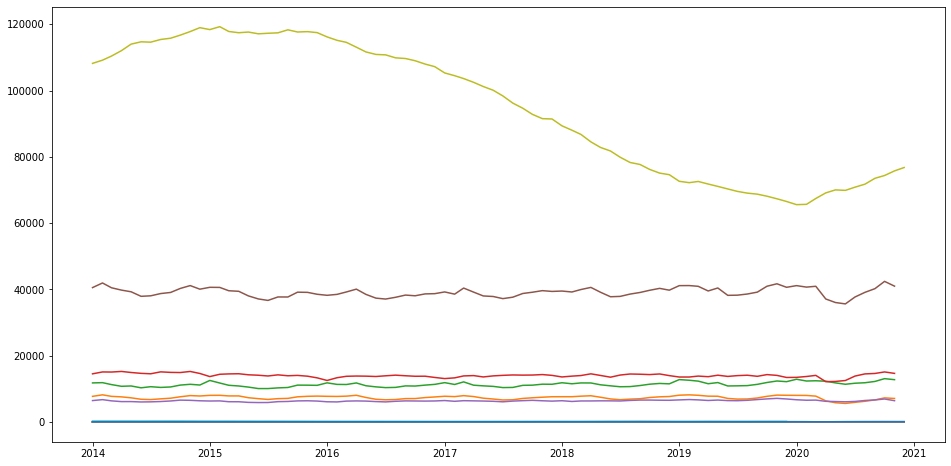

In [21]:
plt.plot(interest_data)
plt.show()

<AxesSubplot:>

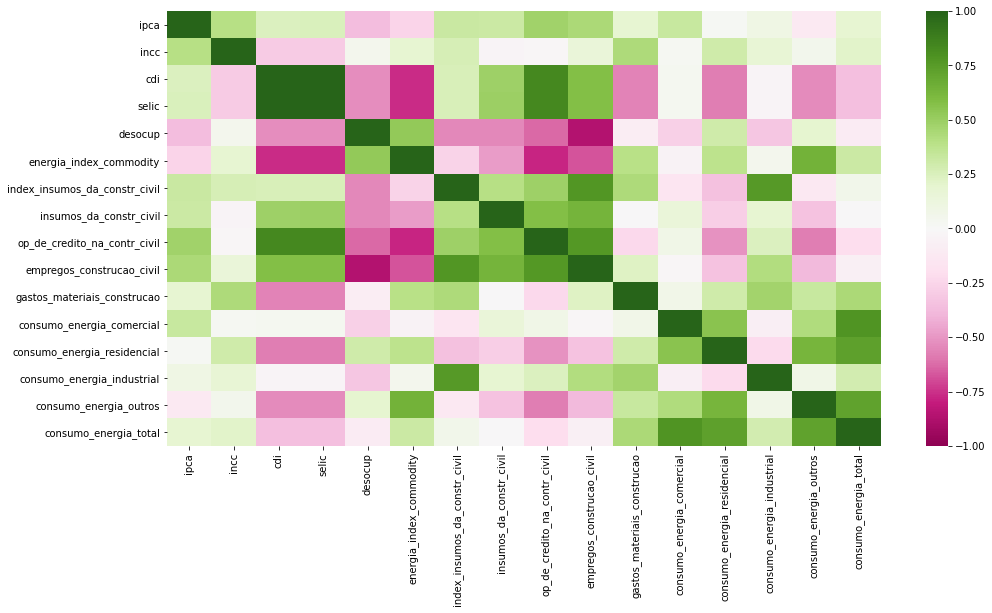

In [24]:
# Creating correlation object: corr
corr = interest_data.corr('spearman')

# Without values
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            cmap = "PiYG",
            vmin = -1, vmax = 1,
            annot = False # this argument must be 'False'
           )

<AxesSubplot:>

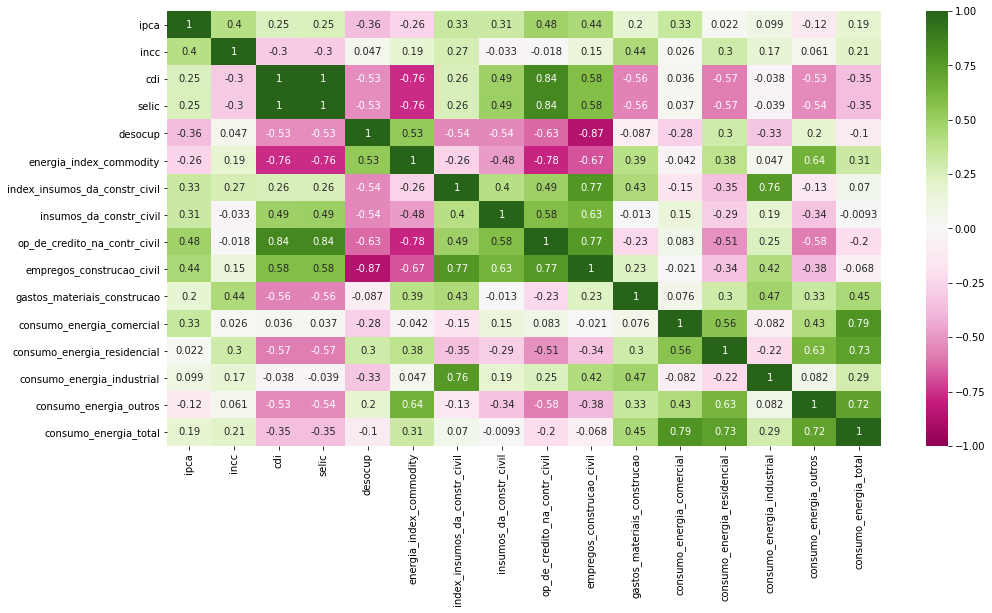

In [25]:
# With values
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            cmap = "PiYG",
            vmin = -1, vmax = 1,
            annot = True # this argument must be 'True'
           )